### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#Import data
df = pd.read_csv(r'C:\Users\kater\Desktop\DATA IMMERSION\ACHIEVEMENT 6\archive\All data sets.csv', index_col= False)

In [4]:
#Create path
path = r'C:\Users\kater\Desktop'

### 2. Data Cleaning

In [6]:
df.columns

Index(['Year', 'Country', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Family', 'Life Expectancy', 'Freedom',
       'Perceptions of Goverment Corruption', 'Generosity'],
      dtype='object')

In [8]:
df.head(20)

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Perceptions of Goverment Corruption,Generosity
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
5,2015,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
6,2015,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610
7,2015,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
8,2015,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501
9,2015,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562


In [9]:
df.shape

(782, 10)

#### Missing values

In [11]:
#Check for missing values
df.isnull().sum()

Year                                   0
Country                                0
Happiness Rank                         0
Happiness Score                        0
GDP per Capita                         0
Family                                 0
Life Expectancy                        0
Freedom                                0
Perceptions of Goverment Corruption    1
Generosity                             0
dtype: int64

One missing value found, no change needed

#### Duplicate check

In [12]:
dups = df.duplicated()

In [13]:
dups.shape

(782,)

No duplicates were found

#### Extreme values check

C:\Users\kater\AppData\Local\Temp\ipykernel_12436\611467490.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Happiness Score'], bins=25)
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_i

<Axes: xlabel='Happiness Score', ylabel='Density'>

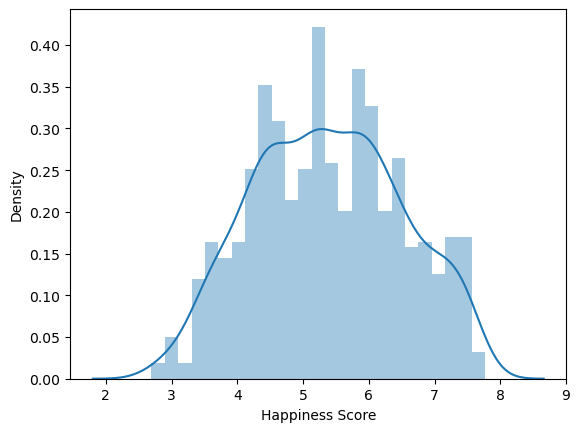

In [18]:
#Check for the extreme values in the column "Happiness score"
sns.distplot(df['Happiness Score'], bins=25)

In [19]:
#Check the mean
df['Happiness Score'].mean()

5.379017902998722

In [20]:
#Check the median
df['Happiness Score'].median()

5.322

In [21]:
#Check the max
df['Happiness Score'].max()

7.769

No extreme values were found

C:\Users\kater\AppData\Local\Temp\ipykernel_12436\2061843464.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Freedom'], bins=25)
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_n

<Axes: xlabel='Freedom', ylabel='Density'>

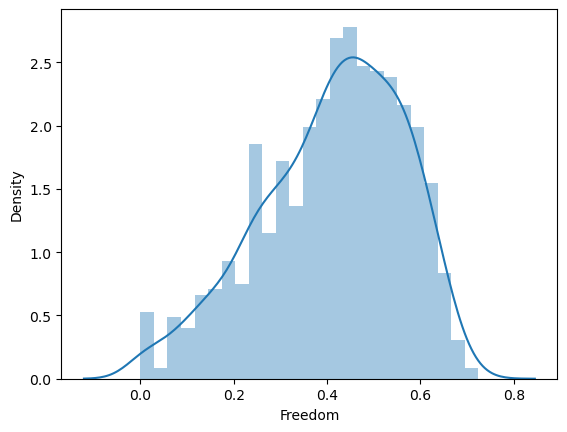

In [23]:
#Check for the extreme values in the column "Freedom"
sns.distplot(df['Freedom'], bins=25)

In [25]:
#Check the mean
df['Freedom'].mean()

0.41109082582352935

In [26]:
#Check the median
df['Freedom'].median()

0.431

In [27]:
#Check the max
df['Freedom'].max()

0.724

No extreme values were found

### 3. Hypothesis

If the level of freedom is high, then the happiness score is high as well

### 4. Data Prep for Regression Analysis

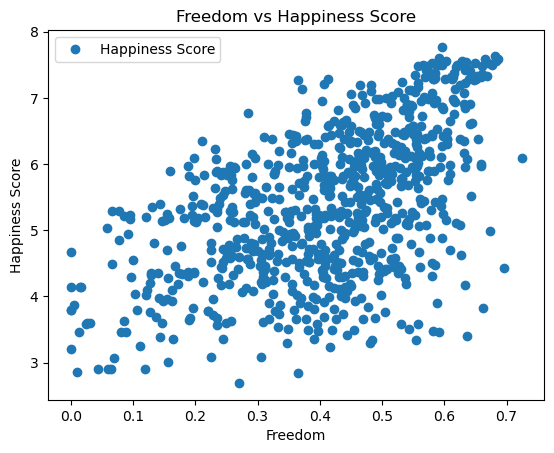

In [28]:
# Create a scatterplot using matplotlib 
df.plot(x = 'Freedom', y='Happiness Score',style='o') 
plt.title('Freedom vs Happiness Score')  
plt.xlabel('Freedom')  
plt.ylabel('Happiness Score')  
plt.show()

In [29]:
#Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Freedom'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [30]:
X

array([[0.66557   ],
       [0.62877   ],
       [0.64938   ],
       [0.66973   ],
       [0.63297   ],
       [0.64169   ],
       [0.61576   ],
       [0.6598    ],
       [0.63938   ],
       [0.65124   ],
       [0.41319   ],
       [0.63376   ],
       [0.62433   ],
       [0.48181   ],
       [0.54604   ],
       [0.49049   ],
       [0.61583   ],
       [0.61777   ],
       [0.5845    ],
       [0.64157   ],
       [0.59625   ],
       [0.63274   ],
       [0.42908   ],
       [0.54252   ],
       [0.5421    ],
       [0.61477   ],
       [0.44132   ],
       [0.6404    ],
       [0.55011   ],
       [0.44974   ],
       [0.46364   ],
       [0.60362   ],
       [0.53466   ],
       [0.55664   ],
       [0.31048   ],
       [0.45951   ],
       [0.60365   ],
       [0.3974    ],
       [0.55499   ],
       [0.59657   ],
       [0.55884   ],
       [0.4035    ],
       [0.57733   ],
       [0.65821   ],
       [0.31751   ],
       [0.49615   ],
       [0.33208   ],
       [0.485

In [31]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [32]:
#Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Regression Analysis

In [33]:
#Create a regression object.
regression = LinearRegression()

In [34]:
#Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
#Predict the values of y using X.
y_predicted = regression.predict(X_test)

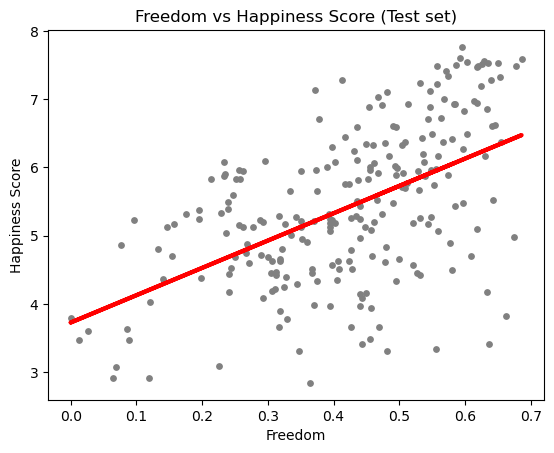

In [36]:
#Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Freedom vs Happiness Score (Test set)')
plot_test.xlabel('Freedom')
plot_test.ylabel('Happiness Score')
plot_test.show()

It seams that mostly the hifgher level of freedom, higher the happiness score

In [37]:
#Check the model performance statistics—MSE and R2 score.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [38]:
#Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.00888106]]
Mean squared error:  0.916642618708245
R2 score:  0.3024966762280601


In [39]:
y_predicted

array([[5.59221312],
       [5.91800194],
       [5.52814055],
       [5.91415341],
       [5.04318391],
       [4.72464868],
       [5.0360481 ],
       [5.9682733 ],
       [5.78386478],
       [4.68354719],
       [6.14498478],
       [4.68282559],
       [5.95007298],
       [5.30865201],
       [4.2001964 ],
       [4.73409918],
       [4.95432202],
       [4.52011821],
       [5.01247588],
       [6.07120002],
       [5.99733769],
       [5.20842999],
       [6.16655256],
       [5.87390424],
       [6.29243143],
       [5.95809075],
       [5.42090068],
       [6.09840158],
       [5.4327781 ],
       [5.62134474],
       [6.34695221],
       [5.48905166],
       [4.58071939],
       [5.50107831],
       [5.85786872],
       [4.94384384],
       [4.62714223],
       [5.13097841],
       [5.33777646],
       [5.96546709],
       [5.36237102],
       [4.7532244 ],
       [6.25474795],
       [4.63977021],
       [6.34294333],
       [6.28834237],
       [5.06411027],
       [5.924

In [40]:
#Create a dataframe to compare the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.592213
1,6.886,5.918002
2,6.344,5.528141
3,7.119,5.914153
4,3.781,5.043184
5,4.692,4.724649
6,4.390,5.036048
7,5.061,5.968273
8,6.929,5.783865
9,5.488,4.683547


Most of the predicted y values are not close to the actual y values in a dataframe.

It doesn't seam that the model predicted wellon the test set since most of the predicted values are not close to the actual ones. 

This data set is based on human decisions and emotions and that will almost always contain bias.